In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage import io
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

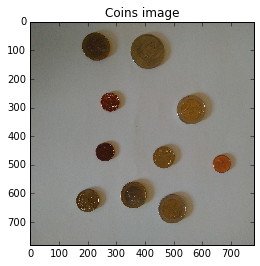

In [2]:
Path = './images/'
coins_im = io.imread(Path.__add__('coins.jpg'))
coins_im = img_as_ubyte(coins_im)
coins_im = rescale(coins_im,0.25)
plt.figure()
io.imshow(coins_im)
plt.title('Coins image')  

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

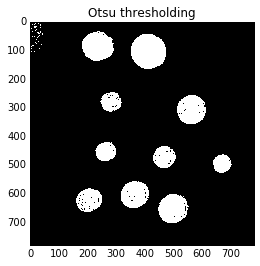

In [3]:
from skimage import color
coins_im=color.rgb2gray(coins_im)
threshold_global_otsu = threshold_otsu(coins_im)
global_otsu = coins_im < threshold_global_otsu
plt.figure()
io.imshow(global_otsu)
plt.title('Otsu thresholding')  

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

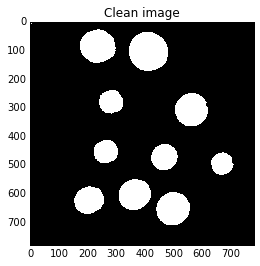

In [15]:
selem = disk(2)
eroded = erosion(global_otsu, selem)
selem = disk(9)
clean_im = dilation(eroded, selem)
plt.figure()
io.imshow(clean_im)

plt.title('Clean image')

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

In [17]:
import ImageDraw

label_im=label(opened,connectivity=2)
print(label_im)
props = regionprops(label_im)

for theregion in props:
    x = theregion.centroid[1]
    y = theregion.centroid[0]
    r = theregion.major_axis_length/2
    
    draw = ImageDraw.Draw(clean_im)
    draw.ellipse((x-r, y-r, x+r, y+r), fill = 'blue', outline ='blue')
    
plt.figure()
io.imshow(clean_im)

ImportError: No module named ImageDraw

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 